### REGRESSION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading the CSV file
stud_perform = pd.read_csv("data\student-mat.csv",delimiter=";")
stud_perform

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
stud_perform.shape  # The dataset has 395 samples and 33 features.

(395, 33)

In [4]:
# Checking if the dataset has missing values
null_values = stud_perform.isnull().sum()
null_values # The dataset does not have any missing values. Hence no operation is required to remove missing values.


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
stud_perform.info() # Information about the columns of dataset
         # Using the information about the columns, we find all the non-numerical columns in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
# Converting all the non-numerical columns in dataset to numerical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
encode_columns = stud_perform.iloc[:,[0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]]
for i in encode_columns:
    stud_perform[i] = label.fit_transform(stud_perform[i])
stud_perform
    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [7]:
# Correlation Matrix
correlationMatrix = stud_perform.corr()
correlationMatrix

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


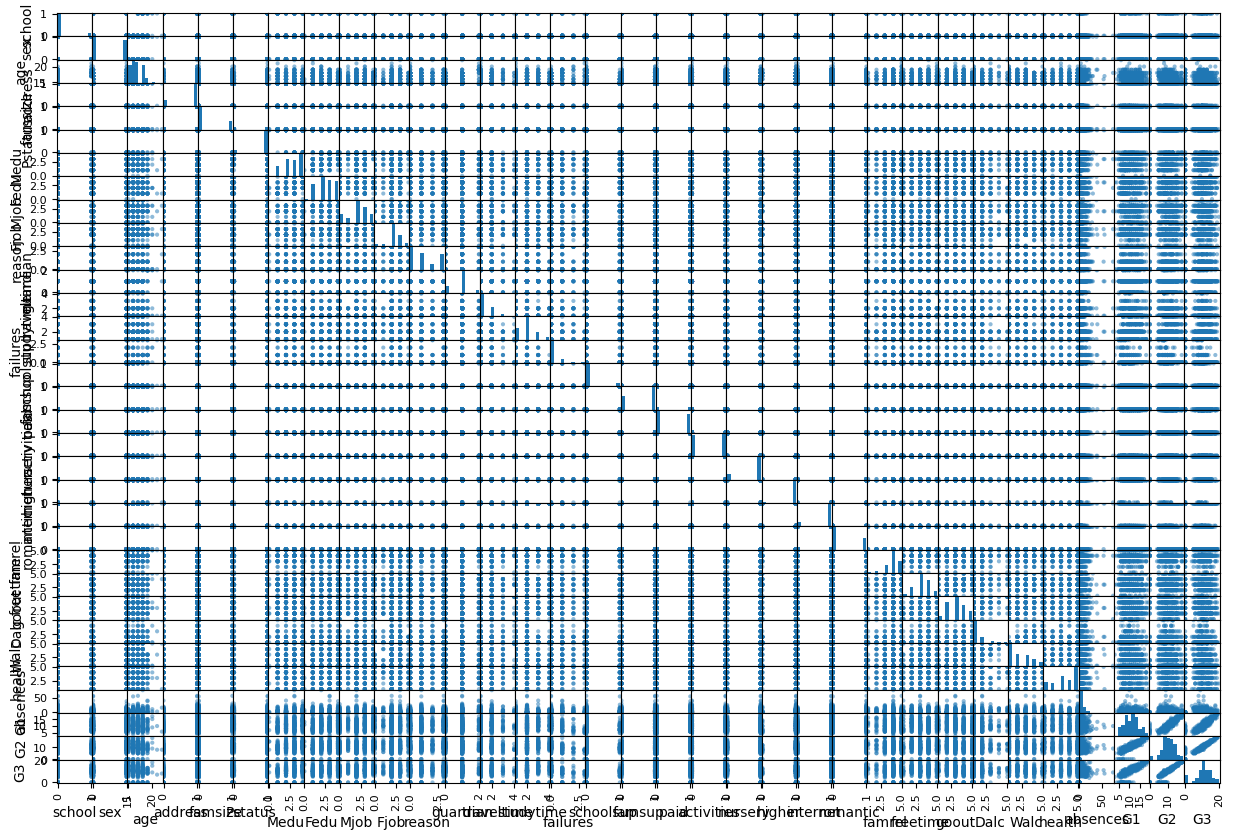

In [8]:
# Scatter Matrix
pd.plotting.scatter_matrix(stud_perform, figsize=(15, 10))
plt.show()

In [9]:
# Storing the input attributes and the target variable
X = stud_perform.iloc[:,:32] # Input attributes
y = stud_perform.iloc[:,32] # Target variable(G3)
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,5,5,4,4,5,4,11,9,9
391,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,3,4,2,3,14,16
392,1,1,21,0,0,1,1,1,2,2,...,0,5,5,3,3,3,3,3,10,8
393,1,1,18,0,1,1,3,2,3,2,...,0,4,4,1,3,4,5,0,11,12


In [10]:
# Splitting the data in 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
# Performing feature scaling
from sklearn.preprocessing import StandardScaler
stand_scale = StandardScaler()
stand_scale.fit(X_train)
X_train_std = stand_scale.transform(X_train)
X_test_std = stand_scale.transform(X_test)


### LINEAR REGRESSION

In [12]:
# Performing Linear Regression
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train_std,y_train)
LR_score = LR_model.score(X_test_std,y_test) # Finding the R2 score of the model
print("R2 score:",LR_score) 


R2 score: 0.8017064030489103


### SUPPORT VECTOR MACHINES (SVM)

In [13]:
from sklearn.svm import SVR
SVR_model_rbf = SVR(kernel='rbf')   # SVM using rbf kernel
SVR_model_lin = SVR(kernel='linear') # SVM using linear kernel
SVR_model_poly = SVR(kernel='poly')  # SVM using polynomial kernel

SVR_model_rbf.fit(X_train_std,y_train)
SVR_model_lin.fit(X_train_std,y_train)
SVR_model_poly.fit(X_train_std,y_train)

rbf_score = SVR_model_rbf.score(X_test_std,y_test) # Finding the R2 score of SVR model using rbf kernel
lin_score = SVR_model_lin.score(X_test_std,y_test) # Finding the R2 score of SVR model using linear kernel
poly_score = SVR_model_poly.score(X_test_std,y_test) # Finding the R2 score of SVR model using polynomial kernel

print("R2 score of SVM (rbf):",rbf_score)
print("R2 score of SVM (linear):",lin_score)
print("R2 score of SVM (polynomial):",poly_score)

R2 score of SVM (rbf): 0.6348965718699183
R2 score of SVM (linear): 0.801910267728134
R2 score of SVM (polynomial): 0.4870928019688143


### DECISION TREES

In [19]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor() # Performing DecisionTree Regressor
tree_model.fit(X_train,y_train)
tree_score = tree_model.score(X_test,y_test) # Finding the R2 score of the model
print("R2 score:",tree_score)

R2 score: 0.8066423377060506


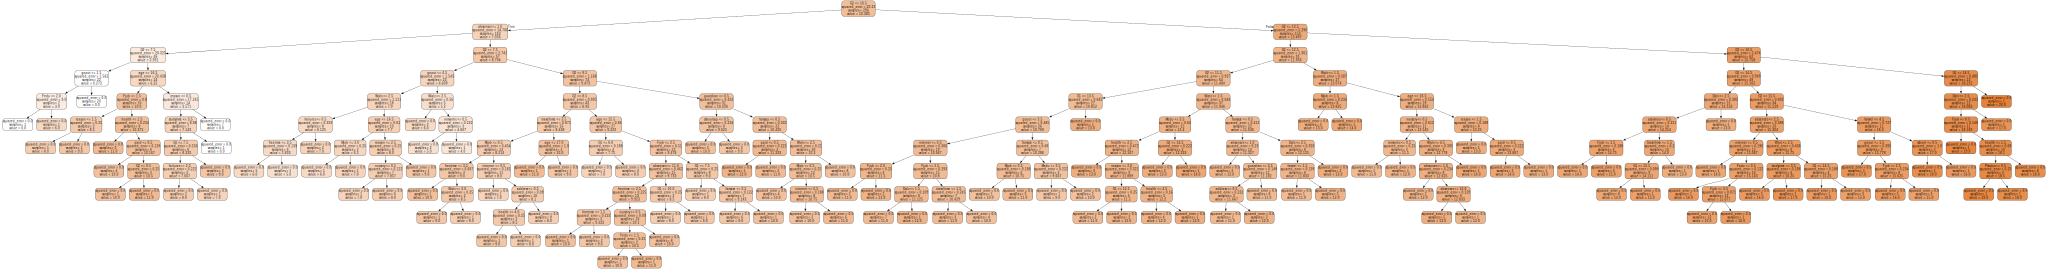

In [20]:
# Visualising the Regression tree
feature_names = stud_perform.columns[:32]
from sklearn.tree import export_graphviz
regression_tree = export_graphviz(tree_model,out_file="data\studentperformance.dot",feature_names=feature_names,rounded=True,filled=True)

from graphviz import Source 
Source.from_file("data\studentperformance.dot")


### RANDOM FOREST

In [23]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_train,y_train)

RF_score = RF_model.score(X_test,y_test) # Finding the R2 score of the model
print("R2 score:",RF_score)

R2 score: 0.8753690168915028


### ADA BOOST


In [25]:
# ADA Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
ADA_model = AdaBoostRegressor()
ADA_model.fit(X_train,y_train)

ADA_score = ADA_model.score(X_test,y_test) # Finding the R2 score of the model
print("R2 score:",ADA_score)



R2 score: 0.8622548299472821


### GRADIENT BOOSTING

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_model = GradientBoostingRegressor()
GBR_model.fit(X_train,y_train)

GBR_score = GBR_model.score(X_test,y_test) # Finding the R2 score of the model
print("R2 score:",GBR_score)


R2 score: 0.8795592243811429


### COMPARISON OF MODEL ACCURACY SCORES

(0.0, 1.0, 0.0, 1.0)

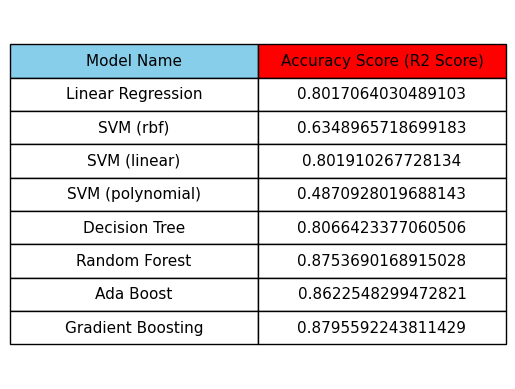

In [34]:
# Tabulating the accuracy scores
results = {"Linear Regression":LR_score,"SVM (rbf)":rbf_score,"SVM (linear)":lin_score,"SVM (polynomial)":poly_score,"Decision Tree":tree_score,"Random Forest":RF_score,"Ada Boost":ADA_score,"Gradient Boosting":GBR_score}
values = list(results.items())
fig,ax=plt.subplots()
tabular = ax.table(cellText=values,loc='center',colLabels=["Model Name","Accuracy Score (R2 Score)"],colColours=['skyblue','red'],cellLoc='center',)
tabular.set_fontsize(16)
tabular.scale(1,2)
ax.axis('off')



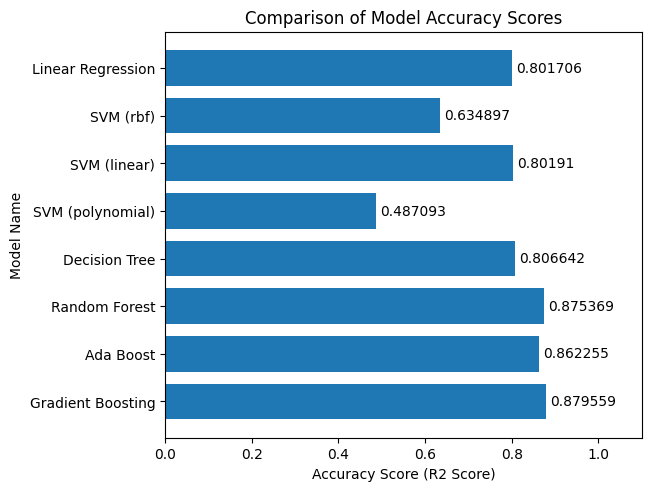

In [36]:
# Plotting the accuracy scores
fig, ax = plt.subplots(layout='constrained')

y_axis = [i for i in range(0,29,4)]
graph = ax.barh(y_axis,results.values(),height=3)
ax.bar_label(graph,padding=3)

ax.set_xlabel("Accuracy Score (R2 Score)")
ax.set_ylabel("Model Name")
ax.set_title("Comparison of Model Accuracy Scores")
ax.set_yticks(y_axis,results.keys())
ax.invert_yaxis()
ax.set_xlim(0,1.1)
plt.show()




    
    